# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
os.chdir('C:\Users\chads\Desktop')

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('cms_hospital_readmissions.csv')
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\chads\Anaconda2\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


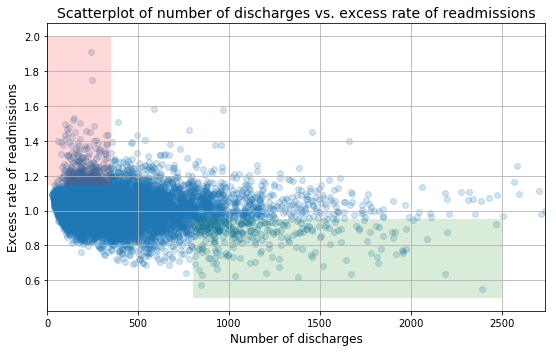

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

I do not agree with the analysis and recommendations, since there is no statistical evidence supporting their hypothesis. Never tested their hypothesis and provided a p_value

H0: There is no difference between excess readmission rate between hospitals with < 100 discharges and hospitals with > 1000 discharges

Ha: There is a difference.

In [6]:
df = clean_hospital_read_df
df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


Count the number of hospitals with < 100 discharges and > 1000 discharges. No need to count the number of hospitals with 0 discharges

In [22]:
dis= df['Number of Discharges']
excess = df['Excess Readmission Ratio']

print "Number of hospitals with discharges < 100:", len(dis[(dis<100) & (dis>0)])
print "Number of hospitals with discharges > 100: ", str(len(dis[dis>1000]))

Number of hospitals with discharges < 100: 1188
Number of hospitals with discharges > 100:  463


Check the users statistics:

In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1

In [29]:
dis100 = df[(df['Number of Discharges'] < 100) & (df['Number of Discharges'] > 0)]

# 63% have excess readmission rate greater than 1
dis100_n = len(dis100) #number of hospitals with <100
ratio = dis100[(dis100["Excess Readmission Ratio"]>1)]
ratio_n = len(ratio["Excess Readmission Ratio"])
percentage=round((float(ratio_n)/dis100_n)*100,2)

mu100 = round(np.mean(dis100["Excess Readmission Ratio"]),4)

print "The mean of excess readmission rate is : ",mu100
print "Excess readmission rate is: ",percentage,'%'

The mean of excess readmission rate is :  1.0226
Excess readmission rate is:  63.22 %


In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

In [30]:
dis1000 = df[(df['Number of Discharges'] > 1000)]

# 44% have excess readmission rate greater than 1
dis1000_n = len(dis1000) #number of hospitals with >1000
ratio_1000 = dis1000[(dis1000["Excess Readmission Ratio"]>1)]
ratio_1000_n = len(ratio_1000["Excess Readmission Ratio"])
percentage_1000 =round((float(ratio_1000_n)/dis1000_n)*100,2)

mu1000 = round(np.mean(dis1000["Excess Readmission Ratio"]),4)

print "The mean of excess readmission rate is : ",mu1000
print "Excess readmission rate is: ",percentage_1000,'%'

The mean of excess readmission rate is :  0.9783
Excess readmission rate is:  44.49 %


The statistics given by the user for mean excess readmission rate and excess readmission rate for hospitals < 100 and > 1000 discharges, checks out

In [40]:
# Create ECDF
def ecdf(x):
    xs = np.sort(x)
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys

In [35]:
dis100ex= dis100["Excess Readmission Ratio"]
dis1000ex= dis1000["Excess Readmission Ratio"]

Plot the two distributions < 100 and > 1000 and calculate the standard deviation

Hospitals with discharges > 1000 have a wider range of distribution for the excess readmission ratio, which is shown by having a standard deviation that is double the magnitude then compared to hospitals with < 100 discharges. Visually, the chart shows the greater distribution as well

The mean is 1.0226 and its standard deviation is 0.058 for < 100
The mean is 0.9783 and its standard deviation is 0.12 for > 1000


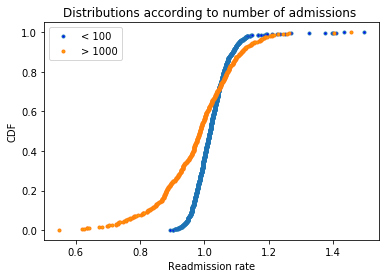

In [54]:
x100, y100 = ecdf(dis100ex)
plt.plot(x100, y100, label="< 100", marker=".", linestyle = 'none', markerfacecolor='blue')
x1000, y1000 = ecdf(dis1000ex)
plt.plot(x1000, y1000, label="> 1000", marker=".", linestyle = 'none', markerfacecolor='orange')
plt.legend()
plt.xlabel('Readmission rate')
plt.ylabel('CDF')
plt.title('Distributions according to number of admissions ')
sigma_100= round((dis100["Excess Readmission Ratio"]).std(),4)
sigma_1000= round((dis1000["Excess Readmission Ratio"]).std(),4)
print "The mean is {} and its standard deviation is {} for < 100".format(mu100, sigma_100)
print "The mean is {} and its standard deviation is {} for > 1000".format(mu1000, sigma_1000)

Compare the two independent means. H0 says that there is no difference between mu100 and mu1000, which is mu100 - mu1000 = 0

Calculate point estimate and standard error in order to calculate the z-score

In [68]:
PE = round(mu100 - mu1000,4)

# Standard Error
s_1=sigma_100
n_1=len(dis[(dis<100) & (dis>0)])
s_2=sigma_1000
n_2=len(dis[(dis<100)])
SE =np.sqrt(((s_1*s_1)/n_1)+((s_2*s_2)/n_2) )

# Z-score:
Z= PE/SE
print "Z-score: ",Z

Z-score:  11.7646323226


In [59]:
from scipy import stats as st

Calculate p-value

In [62]:
print "P-value: ",st.norm.sf(abs(Z))

P-value:  2.9692245308e-32


With an extremely low p-value of almost zero, reject H0 (no difference between excess readmission rate between hospitals with < 100 discharges and hospitals with > 1000 discharges).

Will check if there is a statistical difference between hospitals with < 300 and > 1000 discharges.

First let's compare their distributions....

In [63]:
dis300 = df[(df['Number of Discharges'] < 300) & (df['Number of Discharges'] > 0)]

The mean is 1.0142 and its standard deviation is 0.0825 for < 300
The mean is 0.9783 and its standard deviation is 0.12 for > 1000


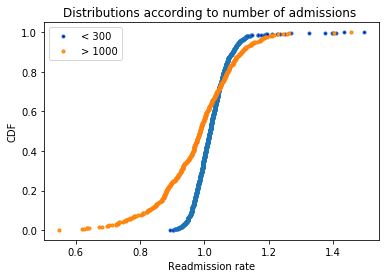

In [65]:
mu300 = round(np.mean(dis300["Excess Readmission Ratio"]),4)
x300, y300 = ecdf(dis300)
plt.plot(x100, y100, label="< 300", marker=".", linestyle = 'none', markerfacecolor='blue')
x1000, y1000 = ecdf(dis1000ex)
plt.plot(x1000, y1000, label="> 1000", marker=".", linestyle = 'none', markerfacecolor='orange')
plt.legend()
plt.xlabel('Readmission rate')
plt.ylabel('CDF')
plt.title('Distributions according to number of admissions ')
sigma_300= round((dis300["Excess Readmission Ratio"]).std(),4)
print "The mean is {} and its standard deviation is {} for < 300".format(mu300, sigma_300)
print "The mean is {} and its standard deviation is {} for > 1000".format(mu1000, sigma_1000)

Compare the two independent means. H0 says that there is no difference between mu300 and mu1000, which is mu300 - mu1000 = 0

Calculate point estimate and standard error in order to calculate the z-score

In [69]:
# Point estimate
PE_1 = round(mu300 - mu1000,4)

# Standard Error
s_3=sigma_300
n_3=len(dis[(dis<300) & (dis>0)])
SE_2 = np.sqrt(((s_3*s_3)/n_3)+((s_2*s_2)/n_2) )
#round(SE,4)

# Z-score:
Z_2= PE_1/SE_2
print "Z-score: ",Z_2

Z-score:  10.1695901346


and now get the p-value...

In [71]:
print "P-value: ",st.norm.sf(abs(Z_2))

P-value:  1.35523392431e-24


With an extremely low p-value of almost zero, reject H0 (no difference between excess readmission rate between hospitals with < 300 discharges and hospitals with > 1000 discharges).

Extremely high z-score and almost zero p-values prove that there a statistical significant difference between the excess readmission rates between hospitals with < 100 and > 1000 discharges. Also proved this between hospitals with < 300 and > 1000 discharges